# Proyecto Final

# Pruebas A/B

Estamos recibiendo una tarea analítica de una tienda en línea internacional. 

Un equipo antes de ti, realizó una prueba A/B pero no consiguieron completarla, abandonando la prueba antes de su analisis.
Este equipo solo nos dejaron las especificaciones técnicas y los resultados de las pruebas.

Nuestra tarea es ayudar a la empresa a entender los resultados obtenidos por el equipo anterior y  decirles si se han observados cambios en las compras de los clientes con los cambios estudiados, esperando como resultado al menos un 10% de aumento en las ventas.


# Descripción técnica

- Nombre de la prueba: `recommender_system_test`

- Grupos: А (control), B (nuevo embudo de pago)

- Launch date: 2020-12-07

- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21

- Fecha de finalización: 2021-01-01

- Audiencia: 15% de los nuevos usuarios de la región de la UE

- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado

- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento `product_page`), instancias de agregar artículos al carrito de compras (`product_card`) y compras (`purchase`). En cada etapa del embudo `product_page → product_card → purchase`, habrá al menos un 10% de aumento.

- Número previsto de participantes de la prueba: 6 000

# Descripción de los datos

**De que trata cada data:**

ab_project_marketing_events_us.csv — el calendario de eventos de marketing para 2020

final_ab_new_users_upd_us.csv — todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020

final_ab_events_upd_us.csv — todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021

final_ab_participants_upd_us.csv — tabla con los datos de los participantes de la prueba


**Estructura ab_project__marketing_events_us.csv:**

name — el nombre del evento de marketing

regions — regiones donde se llevará a cabo la campaña publicitaria

start_dt — fecha de inicio de la campaña

finish_dt — fecha de finalización de la campaña


**Estructura final_ab_new_users_upd_us.csv:**

user_id

first_date — fecha de inscripción

region

device — dispositivo utilizado para la inscripción


**Estructura final_ab_events_upd_us.csv:**

user_id

event_dt — fecha y hora del evento

event_name — nombre del tipo de evento

details — datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos purchase)


**Estructura final_ab_participants_upd_us.csv:**

user_id

ab_test — nombre de la prueba

group — el grupo de prueba al que pertenecía el usuario

# Objetivos del estudio A/B

Como a hemos mencionado anteriormente nuestra tarea es ayudar a la empresa a entender los resultados obtenidos por el equipo anterior y  decirles si se han logrado alcanzar el 10% de aumento en las etapas que nos llevan a tener ventas de los usuarios esperado con los cambios en la página web.

# Descarga de los datos

In [59]:
#cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats
from scipy import stats as st

In [2]:
#cargar los archivos
calendario= pd.read_csv("/datasets/ab_project_marketing_events_us.csv")
new_users= pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")
users_events= pd.read_csv("/datasets/final_ab_events_upd_us.csv")
prueba= pd.read_csv("/datasets/final_ab_participants_upd_us.csv")

# Preparación y limpieza de todos los datas

### Data calendario

In [3]:
#manda a llamar info para conocer el tipo de datos que tenemos 
calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [4]:
#visualia todo el data al ser corto
calendario

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [5]:
#buscar valores ausentes
print(calendario.isna().sum())

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64


In [6]:
#buscar filas duplicadas
print(calendario.duplicated().sum())

0


In [7]:
#cambio de tipo de dato para convertir a tipo fecha en columna start_dt
calendario["start_dt"]=pd.to_datetime(calendario["start_dt"] , format="%Y-%m-%d")

In [8]:
#cambio de tipo de dato para convertir a tipo fecha en columna start_dt
calendario["finish_dt"]=pd.to_datetime(calendario["finish_dt"] , format="%Y-%m-%d")

In [9]:
#info para corroborar el cambio de tipo de dato a datetime
calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


Podemos observar que en este data solo se tuvo que modificar el tipo de dato en las columnas de fechas. Este data no contaba con valores ausentes o duplicados a trabajar.
Este data ya esta listo para su uso.

### Data new_users

In [10]:
#manda a llamar info para conocer el tipo de datos que tenemos 
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [11]:
#visualizan las primeras filas del data
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [12]:
#buscar valores ausentes
print(new_users.isna().sum())

user_id       0
first_date    0
region        0
device        0
dtype: int64


In [13]:
#buscar filas duplicadas
print(new_users.duplicated().sum())

0


In [14]:
#cambio de tipo de dato para convertir a tipo fecha en columna start_dt
new_users["first_date"]=pd.to_datetime(new_users["first_date"] , format="%Y-%m-%d")

In [15]:
#info para corroborar el cambio de tipo de dato a datetime
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


Podemos observar que en este data solo se tuvo que modificar el tipo de dato en la columna de fechas. Este data no contaba con valores ausentes o duplicados a trabajar.
Este data ya esta listo para su uso.

### Data users_events

In [16]:
#manda a llamar info para conocer el tipo de datos que tenemos 
users_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [17]:
#visualizan las primeras filas del data 
users_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [18]:
users_events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [19]:
#buscar valores ausentes
print(users_events.isna().sum())

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64


In [20]:
#buscar filas duplicadas
print(users_events.duplicated().sum())

0


In [21]:
#cambio de tipo de dato para convertir a tipo fecha en columna start_dt
users_events["event_dt"]=pd.to_datetime(users_events["event_dt"] , format="%Y-%m-%d")

In [22]:
#info para corroborar el cambio de tipo de dato a datetime
users_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


Podemos observar que en este data contiene muchos valores ausentes en la columna deyails, estose debe a que solo la etapa details registra un monto de pago, las demás etapas no tienen monto, s por eso que contamos con un total de 86% ausente estos datos, por este motivo no se pueden sustituirse, a que sería inventar ingresos no existentes para la compaia.

Ademas se modifico el tipo de dato en la columna de fechas. 


### Data prueba

In [23]:
#manda a llamar info para conocer el tipo de datos que tenemos 
prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [24]:
#visualia todo el data al ser corto
prueba.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [25]:
#buscar valores ausentes
print(prueba.isna().sum())

user_id    0
group      0
ab_test    0
dtype: int64


In [26]:
#buscar filas duplicadas
print(prueba.duplicated().sum())

0


Este data no contaba con valores ausentes o duplicados a trabajar. Este data ya esta listo para su uso.

# Análisis exploratorio de datos 

   - ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
    - ¿Hay usuarios que están presentes en ambas muestras?
    - ¿Cómo se distribuye el número de eventos entre los días?
    - ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

In [27]:
#Crear un embudo para la conversion de los usuarios en diferentes etapas.
users_count = users_events.groupby('event_name').agg({'user_id': 'nunique'}) #numero de usuarios unicos por evento
users_count= users_count.sort_values(by = 'user_id', ascending=False) #ordenar en orden descendente
users_count

,user_id
event_name,
login,58696
product_page,38929
purchase,19568
product_cart,19284


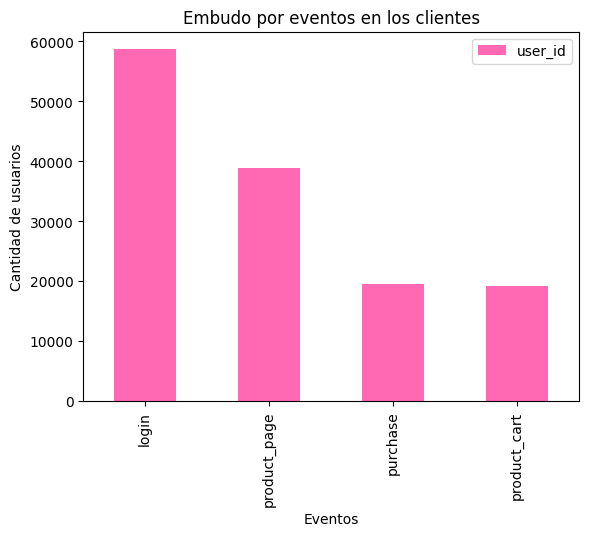

In [28]:
#graficar embudo por eventos sin orden sugerido
users_count.plot(y="user_id", kind= "bar", xlabel= "Eventos",
                   ylabel="Cantidad de usuarios",
                   title="Embudo por eventos en los clientes", 
                   color="hotpink")
plt.show()

In [29]:
#crea una cohorte con la 1er fecha de cada acción de los usuarios
users = users_events.pivot_table(
    index='user_id', 
    columns='event_name', 
    values='event_dt',
    aggfunc='min')
print(users.head())

event_name                     login        product_cart        product_page  \
user_id                                                                        
0001710F4DDB1D1B 2020-12-14 20:20:40 2020-12-14 20:20:42 2020-12-14 20:20:41   
000199F1887AE5E6 2020-12-14 09:56:09 2020-12-14 09:56:11 2020-12-14 09:56:09   
0002499E372175C7 2020-12-22 03:49:52                 NaT 2020-12-22 03:49:55   
0002CE61FF2C4011 2020-12-07 04:37:36 2020-12-07 04:37:37 2020-12-07 04:37:42   
000456437D0EFFE1 2020-12-15 11:25:03                 NaT 2020-12-15 11:25:04   

event_name                  purchase  
user_id                               
0001710F4DDB1D1B                 NaT  
000199F1887AE5E6 2020-12-14 09:56:09  
0002499E372175C7 2020-12-22 03:49:52  
0002CE61FF2C4011                 NaT  
000456437D0EFFE1                 NaT  


In [30]:
#se usa el orden sugerido por la empresa para cerar el embudo correcto
step_1 = ~users['login'].isna()
step_2 = step_1 & (users['product_page'] > users['login'])
step_3 = step_2 & (users['product_cart'] > users['product_page'])
step_4 = step_3 & (users['purchase'] > users['product_cart'])

n_pageview = users[step_1].shape[0]
n_offers = users[step_2].shape[0]
n_checkout = users[step_3].shape[0]
n_payment = users[step_4].shape[0]

print('Visitantes:', n_pageview)
print('Vio productos:', n_offers)
print('Carrito de pago:', n_checkout)
print('Pagado:', n_payment)

Visitantes: 58696
Vio productos: 22119
Carrito de pago: 1347
Pagado: 6


Podemos observar que con el orden sugerido qu nos da la tienda existe una gran diferencia que el primer umbudo creado, esto nos sugiere que no todos los clientes toman la misma ruta para realiar sus compras, lo que debe ser considera por la empresa ya que busca un aumento del 10% en todas las etapas pero eso no condicona en todas las ocasiones que la compra se lleve a cabo como ellos espran.

In [31]:
#Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. 

#visualiza data a usar y se resetea el indice para su uso
users_count= users_count.sort_values(by="user_id", ascending=False).reset_index()
users_count

,event_name,user_id
0,login,58696
1,product_page,38929
2,purchase,19568
3,product_cart,19284


In [32]:
#se crea una columna con los valores anteriores para sacar el porcentaje usando shift
users_count["valor_anterior"]=users_count["user_id"].shift(1)
users_count

,event_name,user_id,valor_anterior
0,login,58696,NaN
1,product_page,38929,58696.0
2,purchase,19568,38929.0
3,product_cart,19284,19568.0


In [33]:
#crea la formula para calcular el % de conversion entre etapas
users_count["conversion_entre_etapas"] = (users_count["user_id"]* 100) /users_count["valor_anterior"]

users_count

,event_name,user_id,valor_anterior,conversion_entre_etapas
0,login,58696,NaN,NaN
1,product_page,38929,58696.0,66.323088
2,purchase,19568,38929.0,50.265869
3,product_cart,19284,19568.0,98.548651


**Valor Nan en el primer dato corresponden al 100% de nuestros usuarios**

In [34]:
#Calcular que porcentaje de usuarios hace todo el viaje desde su primer evento hasta el último
#sacar conversion total
users_count["conversion_total"] = (users_count["user_id"]* 100) /58696

users_count

,event_name,user_id,valor_anterior,conversion_entre_etapas,conversion_total
0,login,58696,NaN,NaN,100.000000
1,product_page,38929,58696.0,66.323088,66.323088
2,purchase,19568,38929.0,50.265869,33.337877
3,product_cart,19284,19568.0,98.548651,32.854028


Nuestro embudo nos muestra como solo el 32.85% de los usuarios que ingresan al sitio de inicio, logran finalizar en la visualiación del producto dentro del carrito de compra.

En esta ocasión no buscamos una ruta con una secuencia exacta para las etapas que debería seguir el usuario, por lo que el resultado mostrado es el que usaremos.

El porcentaje creado en la tabla nos indica las etapas donde más se pierden los usuarios, lo que nos indica que es de la etapa de product_page a purchase donde menor retensión de clientes existe.

Del 100% de usuarios únicos que ingresaron 58696 solo el 32.85% logra llegar a la útima etapa, y demostrando de nuevo esta columan el dato pasado sobre la etapa donde más pérdidas tenemos como emprsa de los clientes.

In [35]:
#agrupa por evento, se cuenta el número de usuarios únicos por grupo
group_count=prueba.groupby("group").agg({"user_id":"nunique"}).reset_index()
group_count

,group,user_id
0,A,7874
1,B,6205


**¿El número de eventos por usuario está distribuido equitativamente entre las muestras?**

El grupo A /grupo control) cuenta con el 54.209% del registro de los usuarios, mientras que el grupo B (grupo con nuevo metodo de pago) cuenta con el 45.79%

In [36]:
#unir las tablas con datos de usuarios y grupo al que pertenece
datamerge=users_events.merge(prueba, on="user_id", how="left")
datamerge

,user_id,event_dt,event_name,details,group,ab_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B,interface_eu_test
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,NaN,NaN
...,...,...,...,...,...,...
429471,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,NaN,NaN
429472,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,NaN,NaN
429473,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,NaN,NaN
429474,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,A,interface_eu_test


In [37]:
#agrupan los usuarios por grupo A y B respectivamente
group_A= datamerge[datamerge ["group"]== "A"]

group_B= datamerge[datamerge["group"]== "B"]

#Crea un filtro para buscar usuarios que están presentes en ambas muestras

print(group_A.merge(group_B, on="user_id", how="inner").reset_index()["user_id"].unique())

['2F46396B6766CFDB' 'CF03E97B314C5632' '2828E6688DC580C4'
 '0EA9AB1C2A159C77' 'C286A270CFB9925D' '68373F4331DDD2E6'
 '748DD5E33B6F98C3' 'B582D211C1BE1FFD' '8FC9D1BB3017BE66'
 '8FF91E21E27A330D' '27802765D2458B2B' '4A55475E078F40DC'
 'EAFB9027A27D510C' '8C69C35FB5E142F8' '94464DF2E5398E26'
 '48CFE37563932DC2' 'A8C57C0D4118F4D7' '4409E20FCD07CD14'
 '8094961C0D414366' 'D1DFCE26FF3C713F' 'AE49EDDFB9DABE03'
 '24FB1A84E1C30291' 'D9BAC4C97F9C107F' 'C74B6E95352ADE79'
 'EF6DBFA129654B41' '9F0571C70D4BD33B' '8F5D7DE5A7B06249'
 '123C3AC236BE84F0' 'A7EE379599B38AE0' 'A6E6ECF8E4924633'
 'A2212CF79158D340' 'FB158B12F907E8FB' '17DD74F263374528'
 'C165E8C0C5DE19FF' '3FC3BE7BAA35F33F' 'C5AE17CBD0B33628'
 'D82DD23742E57665' '88EEB8C6C37A0521' '9F32866BD479E689'
 '30DEB75B33B92DC8' '495E506B3D29645B' '84AAB026310D49C4'
 '3279592816F7F6D2' 'EB215155BA578253' '3E286601D309601C'
 '2F28A3B279E5494A' '37E78FED858E7061' '10F028FB8193F8C1'
 '49C45D71BDCE2F69' 'A731AAAEA9F5C533' '1AD9F88DA92AC4E5'
 '2A12B7DB3C6E

Eiste una gran cantidad de usuarios repetidos en ambos grupos, esto pudo darse al llevarse a cabo las pruebas al miso tiemp haciendo que el mismo usuario compartiera grupo.

In [38]:
#¿Cómo se distribuye el número de eventos entre los días?

#Agregar ua columna con el día para unir los eventos
users_events["events_day"]=users_events["event_dt"].dt.date

#agrupar por evento y día
events_per_day=users_events.groupby(['event_name', "events_day"]).agg({'user_id':'count'})
events_per_day

user_id
event_name events_day         
login      2020-12-07     4913
           2020-12-08     5447
           2020-12-09     5227
           2020-12-10     6045
           2020-12-11     6000
...                        ...
purchase   2020-12-26     1985
           2020-12-27     1729
           2020-12-28     1557
           2020-12-29     1424
           2020-12-30       15

[92 rows x 1 columns]

Podemos observar que todos los días coinciden con un promedio de usuarios que fueron estando en los eventos, como ya se ha analiado, no existen grandes anomalias entre la suma de lo usuarios por día que fueorn realizando los eventos, lo que nos habla de una estabilidad en el flujo de clientes durante la prueba que puede ser caracteristica de nuestra online.

**¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?**

Debemos considerar que la prueba duro tan solo 3 semanas, esto puede o NO afectar en los resultados si es que falto tiempo.

Como ya mencionamo anteriormente gran cantidad de los usuarios s repiten en ambos grupos, es necesario evaluar si se desea si esto fue un error al realizar la prueba, al no tener al equipo inicial que la realizó buscaremos con mayor deteniemiento el comportamiento de los usuarios durante la prueba para ver si esto afecta.

La distirbución de los participantes es correcta, así que podemos continuar con la prueba A/B

# Prueba A/B

In [39]:
datamerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429476 entries, 0 to 429475
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     429476 non-null  object        
 1   event_dt    429476 non-null  datetime64[ns]
 2   event_name  429476 non-null  object        
 3   details     61134 non-null   float64       
 4   group       102838 non-null  object        
 5   ab_test     102838 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 22.9+ MB


La tabla creada anteriormente al unir los datos de los cliente junto con el grupo al que corresponde es importante sealar que los valores ausentes presentes se deben a que solo los clientes que han llegado a realiar una compra tendran un total que han pagado, por lo que el los datos ausentes corresponden a etapas previas del proceso de compras.

In [40]:
#agrupa por evento, se cuenta el número de usuarios únicos por grupo
gruposmerge=datamerge.groupby("group").agg({"user_id":"nunique"}).reset_index()
gruposmerge

,group,user_id
0,A,7874
1,B,6205


Unimos las tablas de users_events y pruebas para encontrar los usuarios y en que prueba fueron colocados.

Al hacer la unión existen usuarios que nos estan registrados en ninguna prueba, dichos usuarios serán omitidos para la prueba A/B. 

Al unir estos datos y hacer el conteo de los grupos han salido la misma cantidad de participantes en ambas pruebas, lo que corrobora que los porcentajes de usuarios en cada prueba siguen siendo los mismos.

A pesar de que los datos obtenidos si se encuentran dentro de rango establecido por la prueba, muchos datos sobre los usuarios y en que grupo se encuentran no estan registrados, esto pudo ser controlado por el equipo o simplemente una falla en el sistema.

Lo que si se puede demostrar es que el objetivo de obtener 6000 participantes para la prueba fueron cubiertos, ya que al final se tuvo un registro total de 6205.

Se hace esta unión para poder conocer la actividad entre grupos y si ha tenido un impacto la prueba, la cual analizaremos a continuación.

In [41]:
datamerge

,user_id,event_dt,event_name,details,group,ab_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B,interface_eu_test
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,NaN,NaN
...,...,...,...,...,...,...
429471,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,NaN,NaN
429472,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,NaN,NaN
429473,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,NaN,NaN
429474,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,A,interface_eu_test


In [42]:
#Agregar ua columna con el día para unir los eventos
datamerge["events_day"]=datamerge["event_dt"].dt.date

In [43]:
#Representar gráficamente el ingreso acumulado por grupo.

#agrupan solo los eventos d purchase
eventspurchase=datamerge[datamerge["event_name"]=="purchase"]
eventspurchase

,user_id,event_dt,event_name,details,group,ab_test,events_day
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,NaN,NaN,2020-12-07
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,NaN,NaN,2020-12-07
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,NaN,NaN,2020-12-07
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B,interface_eu_test,2020-12-07
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,NaN,NaN,2020-12-07
...,...,...,...,...,...,...,...
61129,1455450835F72F5E,2020-12-30 09:27:10,purchase,4.99,NaN,NaN,2020-12-30
61130,339C4C55021A83C6,2020-12-30 12:55:08,purchase,9.99,NaN,NaN,2020-12-30
61131,D1553B56FFA8974B,2020-12-30 03:15:35,purchase,4.99,NaN,NaN,2020-12-30
61132,245E85F65C358E08,2020-12-30 19:35:55,purchase,9.99,NaN,NaN,2020-12-30


In [44]:
#agrupa por día, se cuenta el número de usuarios únicos por ingreso por grupo
purchasefinal=eventspurchase.groupby(['group', "events_day"]).agg({"details":"sum"}).reset_index()
purchasefinal

,group,events_day,details
0,A,2020-12-07,5177.99
1,A,2020-12-08,4682.94
2,A,2020-12-09,6142.76
3,A,2020-12-10,4397.58
4,A,2020-12-11,4862.58
5,A,2020-12-12,8951.95
6,A,2020-12-13,7296.62
7,A,2020-12-14,11959.68
8,A,2020-12-15,10385.32
9,A,2020-12-16,14790.13


In [45]:
# DataFrame con ingresos acumulados por día, grupo A
cumulativeGroupA = purchasefinal[purchasefinal['group']=='A'][['events_day','details']]

In [46]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeGroupB = purchasefinal[purchasefinal['group']=='B'][['events_day','details']]

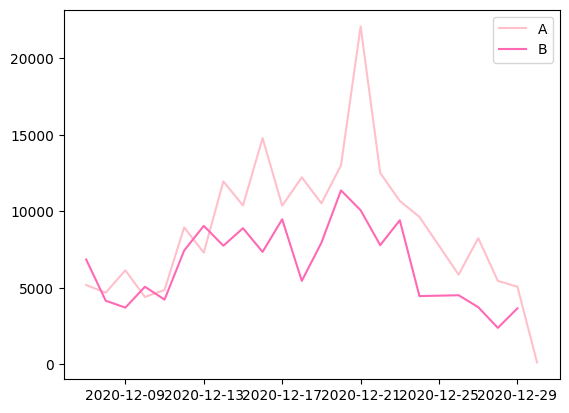

In [47]:
# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeGroupA['events_day'], cumulativeGroupA['details'], label='A', color="pink")

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeGroupB['events_day'], cumulativeGroupB['details'], label='B', color="hotpink")

plt.legend()

Podemos observar que en un inicio el grupo B (nuevo embudo de pago) tuve mejores ingresos pero con el paso de los días el grupo A (grupo control) tomo mejores métricas.
En general el grupo A tiene mucho mejores resultados aunque ambos grupos no logran estabilizar sus ingresos lo que nos indica una falta de tiempo en la prueba para considerar resultados más certeros para una toma de decisiones.

In [48]:
#Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. 
# reunir los datos en un Data nuevo
mergedCumulativeRevenue = cumulativeGroupA.merge(cumulativeGroupB, left_on='events_day', right_on='events_day', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue

,events_day,detailsA,detailsB
0,2020-12-07,5177.99,6852.87
1,2020-12-08,4682.94,4152.94
2,2020-12-09,6142.76,3702.96
3,2020-12-10,4397.58,5067.92
4,2020-12-11,4862.58,4228.08
5,2020-12-12,8951.95,7437.45
6,2020-12-13,7296.62,9051.84
7,2020-12-14,11959.68,7751.29
8,2020-12-15,10385.32,8896.69
9,2020-12-16,14790.13,7346.66


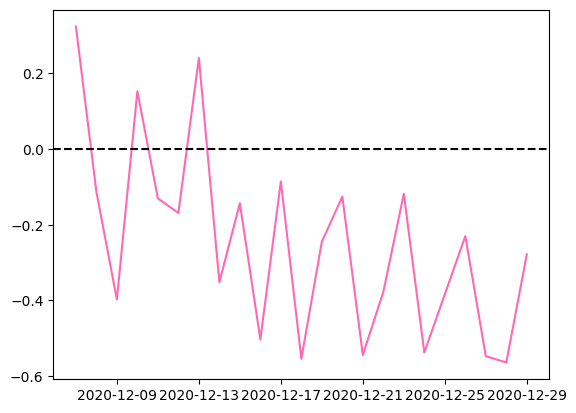

In [49]:
# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['events_day'], (mergedCumulativeRevenue['detailsB']/mergedCumulativeRevenue['detailsA'])-1, color="hotpink")

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')

Como podemos observar la gráfica tiene aumntos y descensos muy drásticos y marcados lo que nos habla de los cambios de ingresos entre ambos grupos.

Afirmando la falta de estabilidad en los ingresos para la toma de decisiones.

Podemos observar la evidencia de de la caida por debajo del 0.0 de nuestra gráfica.

In [50]:
#Calcular la tasa de conversión de cada grupo. 

#agrupar por día por evento
total_events=datamerge.groupby(['group', "events_day", "event_name"]).agg({"user_id":"count"}).reset_index()
total_events


,group,events_day,event_name,user_id
0,A,2020-12-07,login,609
1,A,2020-12-07,product_cart,166
2,A,2020-12-07,product_page,399
3,A,2020-12-07,purchase,201
4,A,2020-12-08,login,656
...,...,...,...,...
178,B,2020-12-29,product_page,270
179,B,2020-12-29,purchase,152
180,B,2020-12-30,login,3
181,B,2020-12-30,product_cart,1


In [51]:
# DataFrame con eventos acumulados por día, grupo A
cumulativeEventA = total_events[total_events['group']=='A'][['event_name','user_id']]

In [52]:
# DataFrame con eventos acumulados por día, grupo B
cumulativeEventB = total_events[total_events['group']=='B'][['event_name','user_id']]

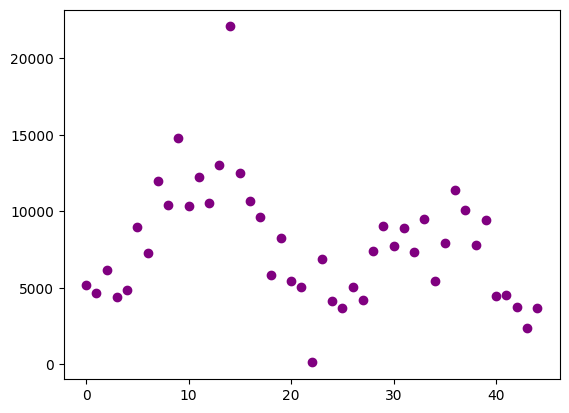

In [53]:
#Traza un gráfico de dispersión de los precios de los pedidos realizados. 

#considerar el precio de revenue de las ordenes 
revenue = pd.Series(range(0, len(purchasefinal['details'])))
#creación de gráfico de dispersión 
plt.scatter(revenue, purchasefinal['details'], color="purple")

Los ingresos entre nuestros usuarios no tienen una cantidad promedio que se siga como tendencia podemos observar la varidad de ingresos registrados, con valores atipicos, teniendo un rango "normal/promedio" de 5000 a 10 000 de ingresos.

Mayor a esta cantidad ya podriamos considerarlos atípicos.

In [54]:
#Calcula los percentiles 95 y 99 de los precios de los pedidos. 

#coloca rango de revenue de la tabla orders
print(np.percentile(purchasefinal['details'], [95, 99]))

[12909.886  18879.3956]


Solo el 5% de los usuarios pagarían más de 12 909 y solo el 1% pagaría más de 18 879 dólares.
Pudiendo observar estos datos en la gráfica anterior.

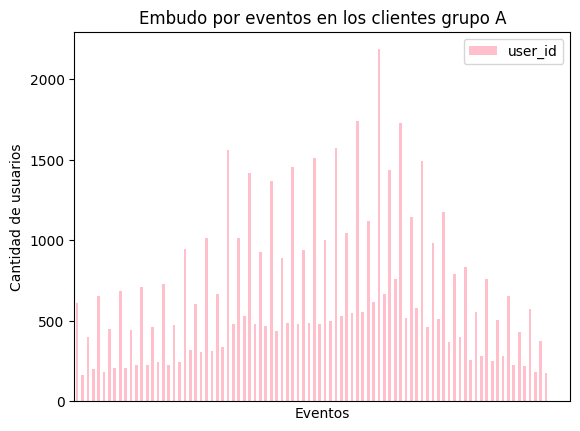

In [55]:
#graficar embudo por eventos
cumulativeEventA.plot(y="user_id", x="event_name", kind= "bar", xlabel= "Eventos",
                   ylabel="Cantidad de usuarios",
                   title="Embudo por eventos en los clientes grupo A", 
                   color="pink")
plt.xticks([])
plt.show()

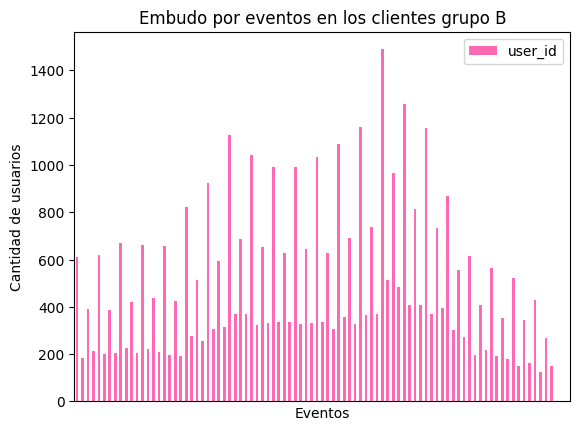

In [56]:
#graficar embudo por eventos
cumulativeEventB.plot(y="user_id", x="event_name", kind= "bar", xlabel= "Eventos",
                   ylabel="Cantidad de usuarios",
                   title="Embudo por eventos en los clientes grupo B", 
                   color="hotpink")
plt.xticks([])
plt.show()

El grupo A (contorl) muestra mejores resultados en sus tablas en cada una de las etapas, esto concuerda con la efectividad que se quería demostrar en la prueba, teniendo mejores números en el grupo esperado.

**¿Qué puedes decir sobre los resultados de la prueba A/B?**

Los gráficos nos mostraron que el grupo A visualmente ha dado mejores resultados durante las pruebas, hemos evaluado los ingresos y las etapas que tenemos para llegara a una compra mpostrando mejores resultados en el grupo A.

Igualmete observamos muchas fluctuaciones en los datos, lo que puede ser normal por el tiempo tan corto que se llevo anteriormnte la prueba. Debemos conisderar esto para no tomar una decision precipitada que pueda afectarnos con el equipo.

El rango de ingresos aún llega a ser muy disperso, y elevado, pero podemos evaluar si esto es normal conociendo las compras anteriores a la prueba  saber si son métricas normales para la empresa o son ingresos anormales debido a la prueva o época del año donde se realizó la prueba (post 4th July).

# Comprobar la diferencia estadística

Por ultimo vamos a demostrar con la prueba de mannwhitneyu si existe alguna diferencia entre amis grupos que nos pueda decir si la prueba ha sido exitosa o no.

Nuestra Ho, nos dice que no existen diferencias signiicativas entre ambos grupos, por lo cual los cambios no tendrán un impacto como lo espera la empresa.

Hasta el momento las gráficas nos han hecho pensar que se podría tener diferencias entre los grupos, pero solo una prueba nos confirmara o corroborará que los gráfico no siempre son tan confiables hasta demostar la información.

In [57]:
#Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. 

#creaemos variables para almacenar información del grupo A
UsersA = (datamerge[datamerge['group'] == 'A'].agg({'details': "sum"}))

#creaemos variables para almacenar información del grupo B
UsersB = (datamerge[datamerge['group'] == 'B'].agg({'details': "sum"}))


In [61]:
alpha = .05 #nivel de significación

results = st.mannwhitneyu(UsersB, UsersA)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de los dos grupos comparados")
else:
    print("No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia")

p-value:  1.0
No se pudo rechazar la hipótesis nula: no podemos sacar conclusiones sobre la diferencia


El valor p es notablemente superior a 0.05, por lo que no hay motivo para rechazar la hipótesis nula y concluir que el tamaño de ingresos entre ambos grupos difiere entre los grupos.

# Conclusiones

- Existen muchos datos ausentes en el data users_events a que solo el evento "detail" nos dará el ingreso logrado para la empresa por usuario, las demás etapas no muestran ingresos por naturaleza del evento.

- El orden previsto por la compañia sobre las acciones que debe seguir el usuario para realizar un pedido no siempre es el correcto, esto deve ser tomado en cuenta a la hora de analizar si hubo un aumento en todas las etapas con la prueba.

- En datos generales solo llega el 32.85% de los clientes que llegan a la pagina finalizan comprndo un producto.

- El mayor punto de pérdida de los clientes es el momento de ver los productos  pasar a la pagina del carrito para proceder al pago, debemos evaluar si existe un problema con la página o los precios o solo falta de decisión de los clientes que esto esta pasando.

- Los grupos están distribuidos equitativamnete entre ambos grupos.

- El grupo A mostro mejores ventas, ,aunque ambos grupos muestran muchas fluctuaciones en sus datos, sin ninguno poder llegar a un punto de estabilidad, esto puede ser por la duración de la prueba, 3 semanas de estudio puede que no haan sido suficientes y esto debe ser un punto a considerar en la toma de dcisiones en la compañia.

- El ingreso puede ir desde los 5000 hasta los 12000 dentro de un rango promedio. También observamos que no existe un rango moda que se pueda observar en las gráficas.

- El grupo A muestra mejores números en todas sus etapas n las gráficas.

- Al comprobar la diferencia con la prueba podemos decir que NO es lo suficientemente grande para considerar que ha un éxito con la prueba.

- Se recomienda una prueba con mayor tiempo para un mejor análisis  una mejor toma de decisiones. Si se debe tomar una decisión con los datos actuales se puede decir que hasta el momento No se han visto una mejora con la plataforma por lo que el cambio en la página no tendría repercusiones en nuestras ventas a futuro.